# <span style=color:blue>Part 1: Introduction </span>

### <span style=color:green>Goal: </span>

#### After inspecting our dataset and exploring the many different tables I could create on SQL, I now need to perform data analysis to find statistical conclusions for my data. We will be trying to answer the following:
    1) What do the following visualizations of the numeric data look like? What can you conclude from the following?
    2) Is there a correlation between Weight and Average WPM?
    3) Is there a correlation between price and Adjusted WPM?
    4) Construct a 95% Confidence Interval for Average WPM.
    5) Is there a relationship between dates and Average WPM/Accuracy? 
    6) Can we predict the WPM of a switch based on Loudness, Enjoyment, Weight, Sound, and Tactility?
    7) If we sampled (with replacement) our switch dataset 100 times, what would our mean WPM be?
    8) 

# <span style=color:blue>Part 2: Load Dataset </span>

### <span style=color:green>Importing Packages </span>

In [1]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import math
import scipy.stats as stats

#Predicitve Modeling:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### <span style=color:green>Loading the Dataset </span>

In [52]:
kb_df = pd.read_csv("C:/Users/alexd/Downloads/Projects/Keyboard Self Study/Part 2/Code/Python/keyboard_dataset.csv")
raw_df = pd.read_csv("C:/Users/alexd/Downloads/Projects/Keyboard Self Study/Part 2/Updated Experiment Data/Updated-Raw Data.csv")

In [53]:
kb_df.head()

,ID,Date,Switch Name,Average WPM,Benchmark Average,Adj. Mean WPM,Average Accuracy,Loudness,Price,Enjoyment,Weight,Sound,Tactility,Date Average,Date Accuracy
0,5,6/13/2025,Oil King,76.9,0.0,0.0,0.89,62.7,0.65,8,65,Low,No,76.9,0.89
1,12,6/16/2025,Banana Milk,77.3,77.8,-0.5,0.90,69.5,0.53,8,68,High,No,77.4,0.90
2,6,6/17/2025,Kiwi,84.2,81.9,2.3,0.91,69.9,0.65,8,67,High,Medium,83.8,0.91
3,8,6/18/2025,Tealios V2,79.5,79.6,-0.1,0.90,62.8,1.20,6,67,Low,No,79.2,0.90
4,3,6/20/2025,Higanbana,77.8,77.2,0.6,0.93,76.6,0.35,7,52,High,No,77.7,0.93


In [4]:
raw_df.head()

,ID,WPM,Accuracy(%):,Date:
0,5,80,0.92,6/13/2025
1,5,84,0.89,6/13/2025
2,5,80,0.89,6/13/2025
3,5,91,0.94,6/13/2025
4,5,88,0.96,6/13/2025


##### Because our datasets is already cleaned, we can move onto the Exploratory Data Analysis.

# <span style=color:blue>Part 3: Exploratory Data Analysis </span>

##### We will only be looking at the summary statistics for the summary dataset, as it encompasses/tells us the same information as the raw dataset, but is more complete. 

### <span style=color:green>Loading the Summary Dataset </span>

In [54]:
kb_df.describe()

,ID,Average WPM,Benchmark Average,Adj. Mean WPM,Average Accuracy,Loudness,Price,Enjoyment,Weight,Date Average,Date Accuracy
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.00000,82.215385,75.361538,0.938462,0.913846,69.130769,0.543077,7.615385,61.307692,81.876923,0.916923
std,3.89444,3.419758,22.866808,2.718314,0.011929,4.281040,0.260333,1.120897,6.421119,3.098159,0.013775
min,1.00000,76.900000,0.000000,-6.300000,0.890000,62.600000,0.200000,6.000000,50.000000,76.900000,0.890000
25%,4.00000,79.500000,79.600000,-0.100000,0.910000,68.000000,0.350000,7.000000,60.000000,79.200000,0.910000
50%,7.00000,83.400000,81.000000,2.000000,0.920000,69.900000,0.530000,8.000000,62.000000,83.400000,0.920000
75%,10.00000,84.200000,82.100000,2.700000,0.920000,70.900000,0.650000,8.000000,67.000000,84.300000,0.930000
max,13.00000,86.800000,89.700000,4.200000,0.930000,76.600000,1.200000,9.000000,68.000000,86.100000,0.930000


#### <span style=color:green>Observations: </span>

#### **Average WPM:** If we took the mean of all average WPMs, I would type at an average of 82.2 WPM. This is fairly accurate to what my overall WPM is in Monkeytype (81 WPM). The distribution also seems to be somewhat skewed left (looking at the quartiles). 
#### **Benchmark Average:** I achieve an average of 75.4 WPM when using the Gateron Oil Kings as the benchmark switch before every test. 
#### **Adj. Mean WPM:** We are expected to do on average about 0.93 WPM better than the Oil Kings. This indicates that I likely perform better on the daily switch compared to the Oil Kings. 
#### **Average Accuracy:** On Average, I achieve a typing accuracy of 91%. The spread of typing accuracy also seems to be very tight, having a STD of 0.012.
#### **Loudness:** Of the 13 switches we tested, the average loudness (measured in dB) was about 69 DB. All things considered, this is fairly loud. However, this is likely due to the method I record the sound of the switches.
#### **Price**: The average cost of one switch in the experiment is about 54 cents, which is fairly expensive in today's market. However, this is likely due to the majority of our switches being "older".
#### **Enjoyment:** On a 10-point scale, I am likely to score a switch a 7.62/10. 
#### **Weight:** The average weight of all of the switches I tried was about 61.3 grams. I believe this is about average to above-average weight for switches today.
#### **Date Average:** When taking the average of all 16 testing days, my mean Daily WPM is 81.9. This is fairly close to our Average WPM. 
#### **Date Accuracy:** My mean Daily accuracy is 0.917, which is slightly higher than my Average Accuracy. 

### <span style=color:green>Loading the Raw Dataset </span>

In [6]:
raw_df.describe()

,ID,WPM,Accuracy(%):
count,950.000000,950.000000,950.000000
mean,6.684211,81.541053,0.913242
std,3.730271,8.149544,0.035539
min,1.000000,42.000000,0.720000
25%,4.000000,76.000000,0.890000
50%,6.000000,82.000000,0.920000
75%,10.000000,88.000000,0.940000
max,13.000000,102.000000,0.990000


#### <span style=color:green>Observations: </span>
#### Overall, there is a decrease in both WPM and accuracy, showing that the different ways we report and record data is important.

### <span style=color:green>Observing the Spread of the Raw Dataset: </span>

### <span style=color:red>Swarmplots: </span>

#### **Idea:** Shows the distribution of each data point, spread across a categorical axis to avoid overlap. 
#### **Aim:** Compare the different distributions across different categories.

#### <span style=color:green>Let's use Swarmplots to look at the distributions of all of our switches:

C:\Users\alexd\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alexd\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alexd\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alexd\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alexd\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points 

<Axes: xlabel='ID', ylabel='WPM'>

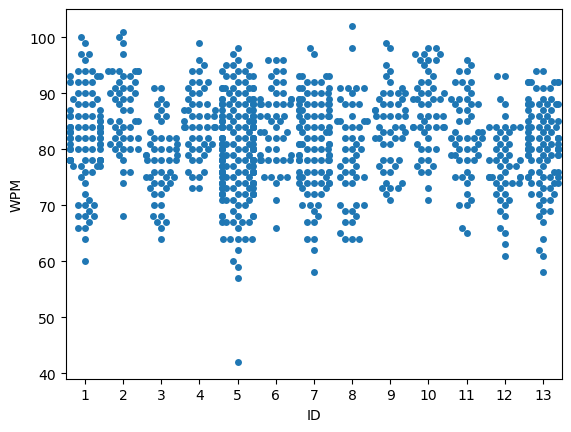

In [7]:
sns.swarmplot(x='ID',y = 'WPM', data = raw_df)

#### Observations:
    1) Most of our tests were between mid 70s and to low-90s. 
    2) We see a fairly noticeable outlier for the Gateron Oil King(ID 5). 
    3) TheHoly Pandas seem to have the highest level of variance amongst all of the switches, having a fairly wide distribtuion.

 # <span style=color:blue>Part 4: Is there a correlation between Weight and Average WPM? </span>

### <span style=color:green> Checking conditions for Pearson's Coefficient </span>

#### **1. Linearity**

Text(0.5, 1.0, 'Scatterplot of Average WPM vs Weight')

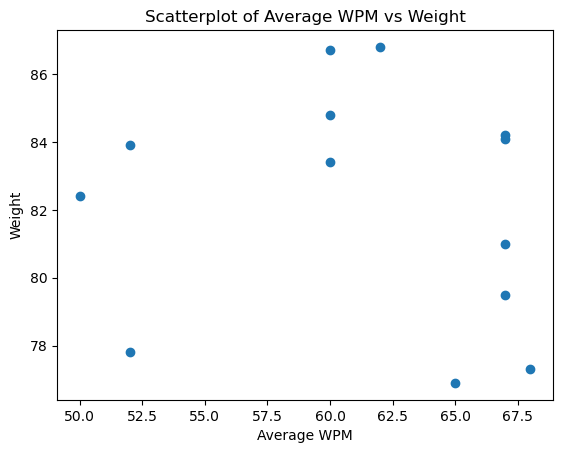

In [8]:
#Making a Scatterplot: 
x = kb_df['Weight']
y = kb_df['Average WPM']
plt.scatter(x, y)
plt.xlabel('Average WPM')
plt.ylabel('Weight')
plt.title('Scatterplot of Average WPM vs Weight')

##### Our data does not show any distinct linear pattern, therefore failing the Linear test

#### **2. Normality**

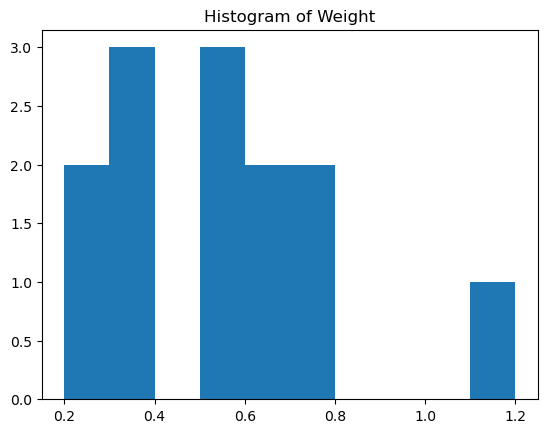

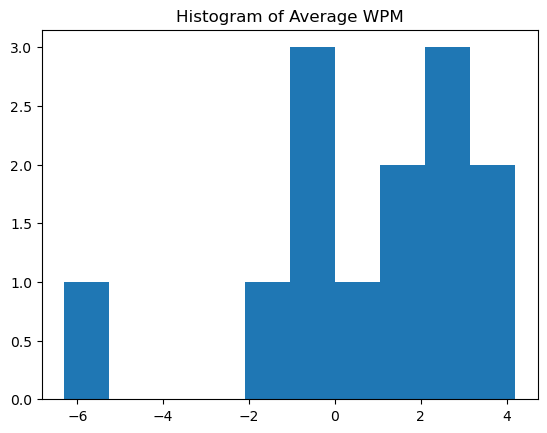

In [60]:
plt.hist(x)
plt.title("Histogram of Weight")
plt.show()

plt.hist(y)
plt.title("Histogram of Average WPM")
plt.show()

##### it looks like our data is not normally distributed, and as a result it fails the Normality test.

#### **3. Constant Variance**

Text(0.5, 1.0, 'Scatterplot for Constant Varaince')

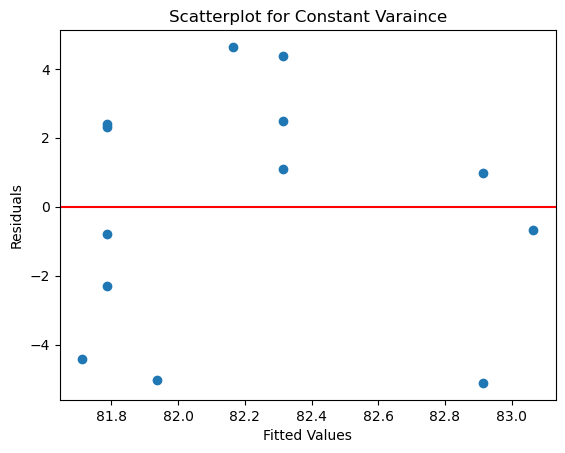

In [10]:
#Creating a OLS model:
intercept = sm.add_constant(x)
model = sm.OLS(y, intercept).fit()

#Finding Residuals: 
residuals = model.resid

#Fitted Values:
fitted_values = model.fittedvalues

#Scatterplot of both:
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'red', linestyle ='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Scatterplot for Constant Varaince')

##### It seems that our scatterplot between both variables is random, telling us that there is no clear pattern.

### **4. Outliers**

##### When observing our scatterplot, we can see that there are no clear outliers in our data. 

#### We will run pearson's coefficent, knowing that our results are likely inaccurate

### <span style=color:green> Finding Pearson's Coefficent </span>

In [64]:
r2 = model.rsquared
r = r2**0.5
print(f"r = {r}")
print(f"r2 = {r2}")

r = 0.15561270953173412
r2 = 0.024215315367807855


#### Oberservations:
 1) There is a very weak positive linear relationship between Weight and our Average WPM.
 2) With a r^2 of 0.02, this means that weight accounts for about 2% of the variations explained in our WPM.

#### Conclusions: 
    1) Judging by the results or r, I can see that if I were to assume all conditions were true, there would be a fairly weak positive relationship between weight and Average WPM. But because the relationship is so weak (0.14), ITh can likely just assume there is no linear relationship between both terms.
    
    2) Our r^2 score further shows that in fact, weight usually plays very little of a factor into my average WPM. However, I'm confident if given an incredibly heavy/light switch, weight may then be an issue and influence my performance(If all conditions were true). 

# <span style=color:blue>Part 5: Is there a correlation between Price and Adjusted WPM? </span>

### <span style=color:green> Checking conditions for Pearson's Coefficient </span>

#### **1. Linearity**

Text(0.5, 1.0, 'Scatterplot of Price vs Adj. Mean WPM')

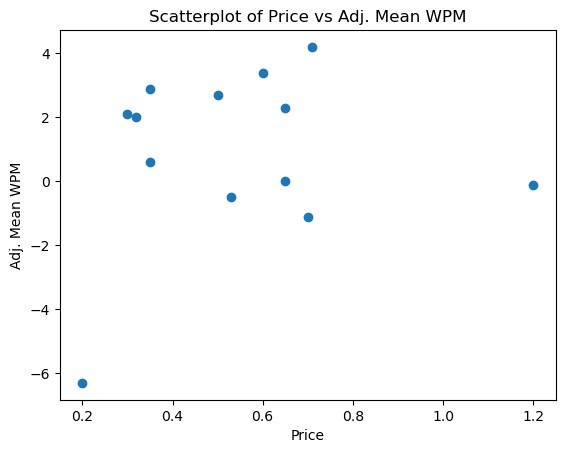

In [57]:
#Making a Scatterplot: 
x = kb_df['Price']
y = kb_df['Adj. Mean WPM']
plt.scatter(x, y)
plt.xlabel('Price')
plt.ylabel('Adj. Mean WPM')
plt.title('Scatterplot of Price vs Adj. Mean WPM')

#### We can see that our data is very loosely linear, outside of one outlier on the bottom left.

#### **2. Normality**

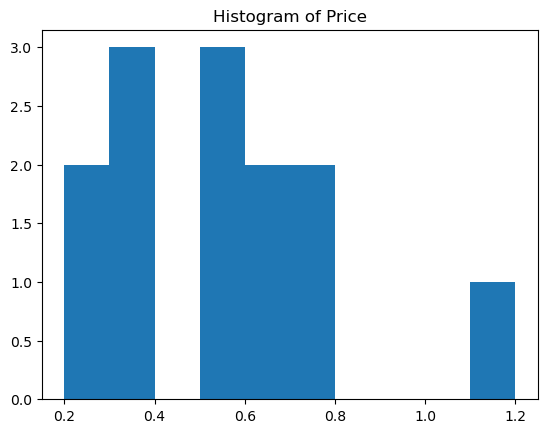

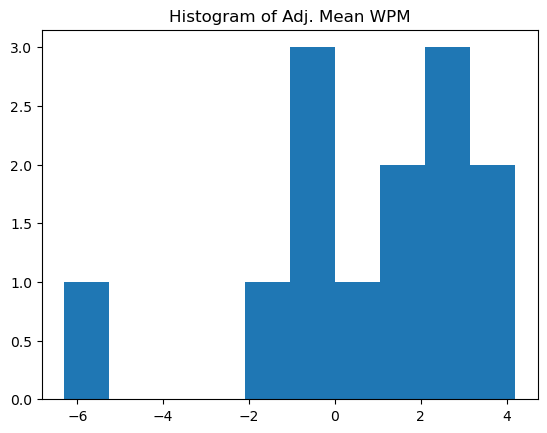

In [59]:
plt.hist(x)
plt.title("Histogram of Price")
plt.show()

plt.hist(y)
plt.title("Histogram of Adj. Mean WPM")
plt.show()

#### We can see that our data is not normally distributed, with the price histogram being bi-modal, and Adj. Mean WPM being fairly similar.

#### **3. Constant Variance**

In [ ]:
intercept = sm.add_constant(x)
model = sm.OLS(y, intercept).fit() 
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'red', linestyle ='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Scatterplot for Constant Varaince')

#### We see a fairly random scatter of points within our residual plot. However, we can again see that there seems to be a fairly large outlier on the bottom left.

### **4. Outliers**

#### We can see one obvious outlier that is quite far from the rest of our datapoints.

### <span style=color:green> Finding Pearson's Coefficent </span>

In [65]:
r2 = model.rsquared
r = r2**0.5
print(f"r = {r}")
print(f"r2 = {r2}")

r = 0.15561270953173412
r2 = 0.024215315367807855


#### Oberservations:
 1) There is almost no linear pattern between both price and performance (Adj. Mean WPM)
 2) With a r^2 of 0.024, this means that weight accounts for about 2.4% of the variations explained in our WPM.

# <span style=color:blue>Part 6: Construct a 95% Confidence Interval for Average WPM. </span>

### <span style=color:green> Checking conditions to conduct a Confidence Interval: </span>

### 1. **Random Sample**

##### Throughout my experiment, I did my best to keep my experiment a radomized one. This reduces the amout of bias and other confounding factors that can be represented when experimenting, such as randomizing the order of testing. Because of this, we pass the Random Sample condition

### 2. **Independence**

##### The sampling was designed so our data would be statistically independent. This was done through separating sessions by several days and breaks every 10 typing tests. As a result, we ensured the performances of tests would not be influenced by others.

### 3. **Normality**

(array([3., 0., 1., 0., 1., 1., 1., 4., 0., 2.]),
 array([76.9 , 77.89, 78.88, 79.87, 80.86, 81.85, 82.84, 83.83, 84.82,
        85.81, 86.8 ]),
 <BarContainer object of 10 artists>)

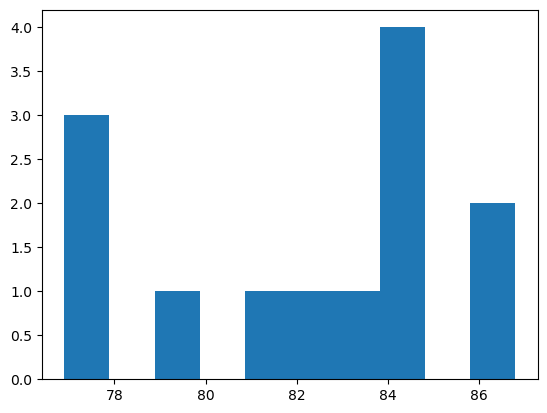

In [12]:
#Let's graph Average WPM:
plt.hist(kb_df['Average WPM'])

#### Because our data is not normally distributed, we fail this condition. 

### <span style=color:green> Making the Confidence Interval: </span>

In [13]:
int_data = kb_df['Average WPM']
stats.t.interval(confidence = 0.95, df = len(int_data)-1, loc = np.mean(int_data), scale=stats.sem(int_data))

(np.float64(80.14884564345674), np.float64(84.28192358731248))

#### Conclusion: We are 95% confident(assuming all conditions are true) that the confidence interval (80.15, 84.282) would contain the true population mean. 

##### Let's try running this with the raw dataset instead. 

# <span style=color:blue>Part 6.2: Construct a 95% Confidence Interval for Average WPM using the Raw Dataset. </span>

### <span style=color:green> Checking conditions to conduct a Confidence Interval: </span>

#### Because we pull our summary data directly from the raw dataset, we pass condition 1/2 with the same reasoning we did earlier for the summary dataset

### 3. **Normality**

(array([  1.,   0.,   4.,  24.,  73., 173., 268., 245., 130.,  32.]),
 array([ 42.,  48.,  54.,  60.,  66.,  72.,  78.,  84.,  90.,  96., 102.]),
 <BarContainer object of 10 artists>)

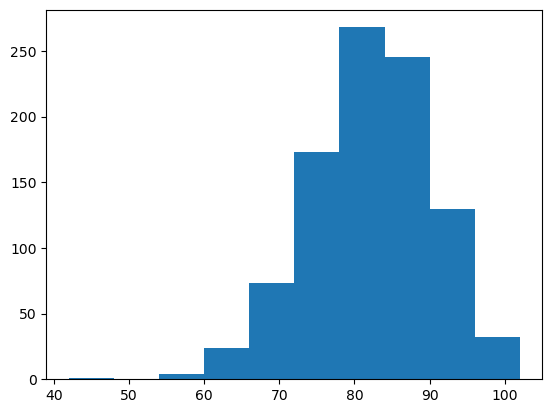

In [14]:
plt.hist(raw_df['WPM'])

##### While the histogram may be slightly skewed left, this passes the normality clause through our large(950) sample size, and roughly resembles a normal distribution. I can now conduct the confidence interval with all conditions passed.

### <span style=color:green> Making the Confidence Interval: </span>

In [15]:
raw_int_data = raw_df['WPM']
stats.t.interval(confidence = 0.95, df = len(raw_int_data)-1, loc = np.mean(raw_int_data), scale=stats.sem(raw_int_data))

(np.float64(81.02216437454538), np.float64(82.05994088861252))

#### Conclusion: We are 95% confident that the confidence interval (80.619, 81.791) would contain the true population mean. 

# <span style=color:blue>Part 7: Is there a relationship between dates and Average WPM/Accuracy? </span>

## <span style=color:green> Checking conditions to conduct Linear Regression: </span>

### 1. **Linearity**

In [16]:
#Converting to Datetime:
raw_df['Date:'] = pd.to_datetime(raw_df['Date:'])

# Create a new column: days_since_start:
raw_df['days_since_start'] = (raw_df['Date:'] - raw_df['Date:'].min()).dt.days

Text(0.5, 1.0, 'Residual Plot')

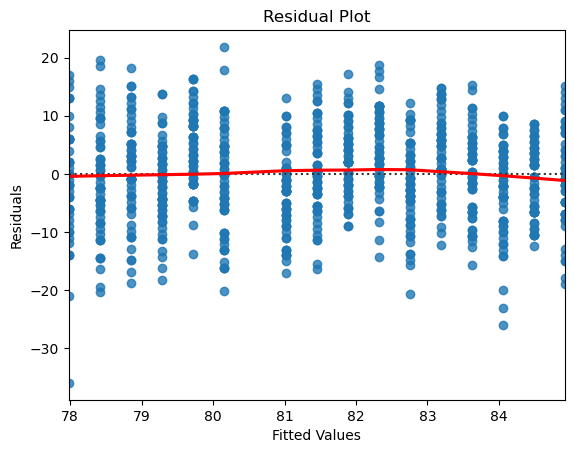

In [17]:
x = raw_df['days_since_start']
y1 = raw_df['WPM']
y2 = raw_df['Accuracy(%):']
con_x = sm.add_constant(x) 
WPM_model = sm.OLS(y1, con_x).fit() 
predictions = WPM_model.predict(con_x)
residuals = y1 - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

Text(0.5, 1.0, 'Residual Plot')

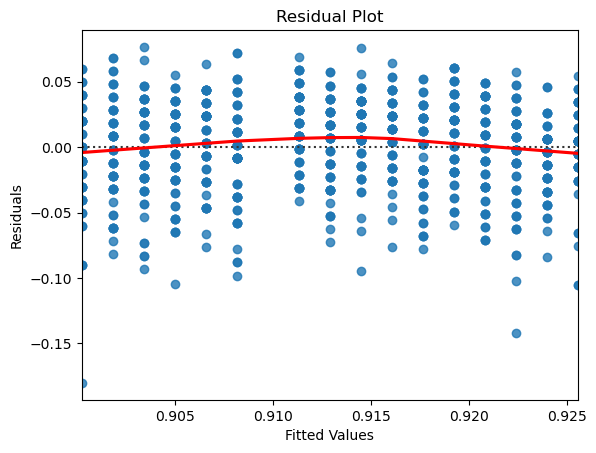

In [18]:
acc_model = sm.OLS(y2, con_x).fit() 
predictions = acc_model.predict(con_x)
residuals = y2 - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

##### There seems to be somewhat of a pattern in both of our predictors; however, I would argue the deviations from the plot are not severe enough to reject the linearity clause.

### **2. Independence:**

##### We passed this earlier when exploring a 95% confidence interval.

### **3. Homoscedasticity:**

##### Recalling both of the residual plots, there does not seem to be a funnel shape present in either. For this reason, we can assume constant variance.

### **4. Normality:**

(array([  1.,   0.,   2.,  14.,  44., 133., 168., 308., 237.,  43.]),
 array([0.72 , 0.747, 0.774, 0.801, 0.828, 0.855, 0.882, 0.909, 0.936,
        0.963, 0.99 ]),
 <BarContainer object of 10 artists>)

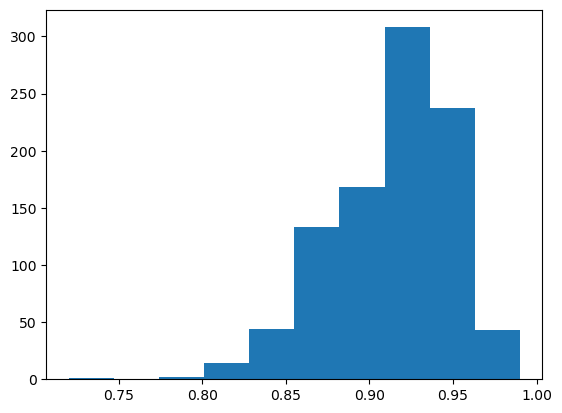

In [19]:
#Checking for Accuracy: 
plt.hist(raw_df['Accuracy(%):'])

##### Although we can see clear skewedness in our data, once again it can be given because of the large size our data is collected through, while somewhat resembling a normal distribution. 

##### We also passed this condition earlier when looking at the 95% confidence interval for WPM.

### **5. Outliers:**

##### Looking at our histograms for both plots, we can see there there may be an outlier in each plot. Let's check if this point is influenctial using Cook's Distance: 

#### **WPM Plot:**

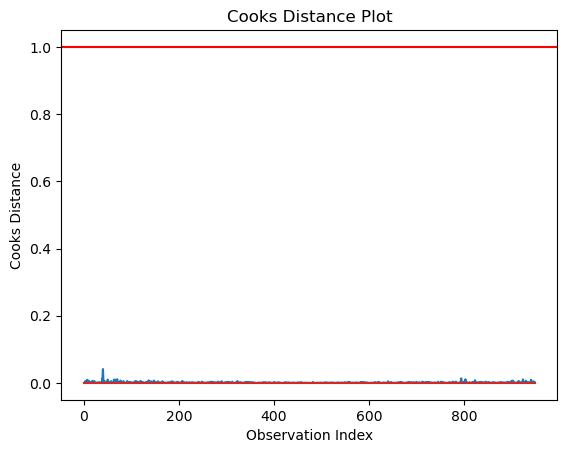

In [20]:
wpm_influence = WPM_model.get_influence()

(wpm_cook_dist, wpm_p_vals) = wpm_influence.cooks_distance 

plt.stem(wpm_cook_dist,markerfmt= '-')
plt.xlabel('Observation Index')
plt.ylabel('Cooks Distance')
plt.title('Cooks Distance Plot')
plt.axhline(1, color = 'red', linestyle= '-')

#### **Accuracy Plot:**

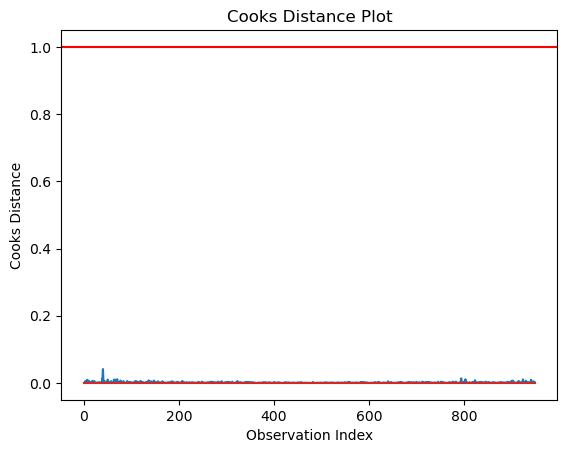

In [21]:
acc_influence = WPM_model.get_influence()

(acc_cook_dist, acc_p_vals) = acc_influence.cooks_distance 

plt.stem(acc_cook_dist,markerfmt= '-')
plt.xlabel('Observation Index')
plt.ylabel('Cooks Distance')
plt.title('Cooks Distance Plot')
plt.axhline(1, color = 'red', linestyle= '-')

#### **Oberservation:** We see that both plots offer about the same Cook's Distance results, showing a slight outlier at around ~40th index. However, because the point in both plots give a fairly small cook's distance(approx 0.05), we can assume it's not highly influencial.

### With all conditions passed, we can now conduct Linear Regression with the following variables.

#### <span style=color:green> WPM Model: </span>

In [22]:
WPM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WPM   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     71.79
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           9.05e-17
Time:                        15:19:06   Log-Likelihood:                -3305.9
No. Observations:                 950   AIC:                             6616.
Df Residuals:                     948   BIC:                             6625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               77.9778      0.492    158.540      0.000      77.013      78.943
days_since_start     0.4340      0.051      8.473      0.000       0.333       0.535
==============================================================================
Omnibus:                        8.076   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.992
Skew:                          -0.214   Prob(JB):                       0.0184
Kurtosis:                       3.136   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style=color:green> ACC Model: </span>

In [23]:
acc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Accuracy(%):   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     49.05
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           4.72e-12
Time:                        15:19:06   Log-Likelihood:                 1846.7
No. Observations:                 950   AIC:                            -3689.
Df Residuals:                     948   BIC:                            -3680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9003      0.002    415.013      0.000       0.896       0.905
days_since_start     0.0016      0.000      7.004      0.000       0.001       0.002
==============================================================================
Omnibus:                       67.135   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.446
Skew:                          -0.634   Prob(JB):                     7.58e-19
Kurtosis:                       3.706   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
WPM_r = 0.070**0.5
ACC_r = 0.049**0.5

print(f'WPM model r = {WPM_r}')
print(f'ACC model r = {ACC_r}')


WPM model r = 0.2645751311064591
ACC model r = 0.22135943621178655


#### **Conclusion:** 
    1) Every day, we are expected to increase our average WPM by 0.43 and accuracy by 0.0016
    2) We see a weak linear relationship between both accuracy(0.22) and WPM(0.26).

# <span style=color:blue>Part 8: Can we predict the WPM of a switch based on Loudness, Enjoyment, Sound, and Tactility? </span> 

## <span style=color:green> Checking conditions to conduct Linear Regression: </span>

### 1. **Linearity**

Text(0.5, 1.0, 'Residual Plot')

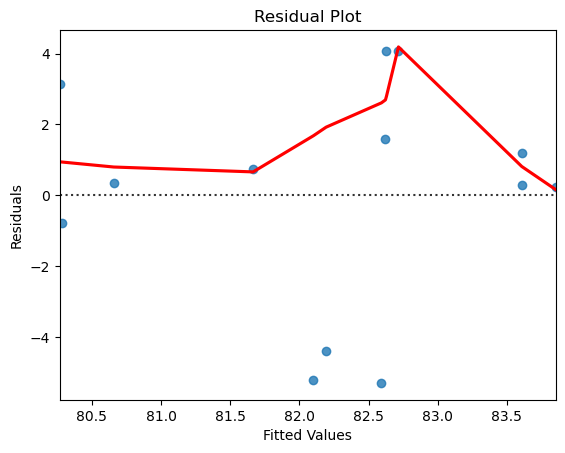

In [25]:
#Checking numeric predictors only:
x = kb_df[['Loudness', 'Enjoyment',]]
y = kb_df['Average WPM']

con_x = sm.add_constant(x) 
x1x2_model = sm.OLS(y, con_x).fit() 
predictions = x1x2_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

##### When looking at numeric predictors, it seems that we unforunately do not achieve linearity, showing that there is a clear pattern to our data. Let's try to apply log-scaling to see if we can fix this.

### <span style=color:green> Applying log to our two numeric variables: </span>

In [26]:
#Apply to both variables:
kb_df['Log_Loudness'] = np.log(kb_df["Loudness"])
kb_df['Log_Enjoyment'] = np.log(kb_df["Enjoyment"])

Text(0.5, 1.0, 'Residual Plot')

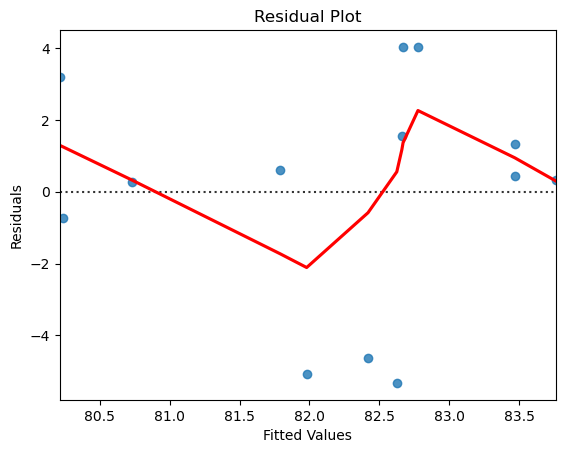

In [27]:
x = kb_df[['Log_Loudness', 'Log_Enjoyment']]
y = kb_df['Average WPM']

con_x = sm.add_constant(x) 
log_x1x2_model = sm.OLS(y, con_x).fit() 
predictions = log_x1x2_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### It seems that this did not solve our problem, and possibily made it even worse. Let's try cubing both variables.

In [28]:
kb_df['Cube_Loudness'] = kb_df["Loudness"]**3
kb_df['Cube_Enjoyment'] = kb_df["Enjoyment"]**3

Text(0.5, 1.0, 'Residual Plot')

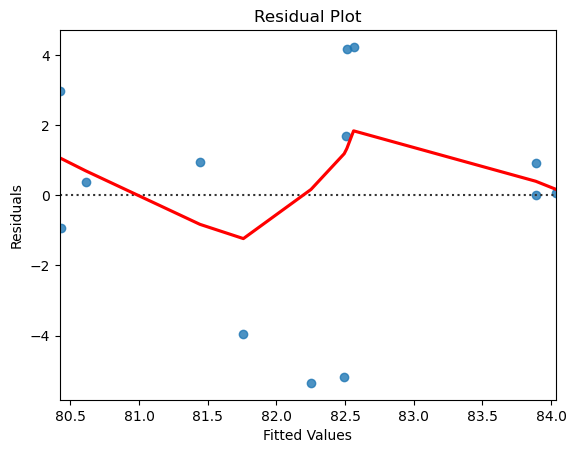

In [29]:
x = kb_df[['Cube_Loudness', 'Cube_Enjoyment']]
y = kb_df['Average WPM']

con_x = sm.add_constant(x) 
square_x1x2_model = sm.OLS(y, con_x).fit() 
predictions = square_x1x2_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### While the best of the 3 options, this still does not prove linearity for both of our variables. For the sake of simplicity, we will stay with the original data.

### 2. **We pass Independence for the same reasons we did other examples**

### **3. Homoscedasticity**

##### Looking at our residual plot, we can clearly see that our plot does not show any clear pattern in scatter. 

(array([8., 0., 0., 1., 0., 0., 1., 0., 0., 3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

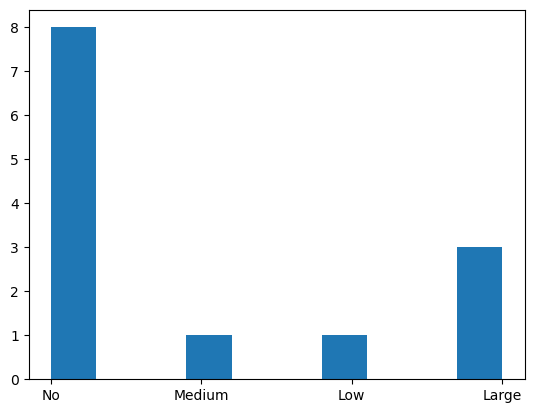

In [30]:
#Checking for our categorical variables: 
plt.hist(kb_df['Tactility'])

##### It seems for Tactility, our residuals are not evenly spread out. Because of this, we do not have constant variance. However, we can potentionally change this by adding all the tactile catergories together. 

In [31]:
#Collpasing our Tactility column and refactoring it: 
kb_df["Tactility"] = kb_df["Tactility"].apply(lambda x: "No" if x == 'No' else "Tactile")
kb_df = pd.get_dummies(kb_df, columns=["Tactility"], drop_first=True)

#Changing the datatype to numeric: 
kb_df["Tactility_Tactile"] = kb_df["Tactility_Tactile"].astype(int)

#Renaming Album Name to Album:
kb_df = kb_df.rename(columns ={'Tactility_Tactile': 'Tactility'})

In [32]:
#Doing this for Sound too: 
kb_df = pd.get_dummies(kb_df, columns=["Sound"], drop_first=True)
kb_df["Sound_Low"] = kb_df["Sound_Low"].astype(int)

kb_df = kb_df.rename(columns ={'Sound_Low': 'Sound'})

In [33]:
kb_df.head()

,ID,Date,Switch Name,Average WPM,Benchmark Average,Adj. Mean WPM,Average Accuracy,Loudness,Enjoyment,Weight,Date Average,Date Accuracy,Log_Loudness,Log_Enjoyment,Cube_Loudness,Cube_Enjoyment,Tactility,Sound
0,5,6/13/2025,Oil King,76.9,0.0,0.0,0.89,62.7,8,65,76.9,0.89,4.138361,2.079442,246491.883,512,0,1
1,12,6/16/2025,Banana Milk,77.3,77.8,-0.5,0.90,69.5,8,68,77.4,0.90,4.241327,2.079442,335702.375,512,0,0
2,6,6/17/2025,Kiwi,84.2,81.9,2.3,0.91,69.9,8,67,83.8,0.91,4.247066,2.079442,341532.099,512,1,0
3,8,6/18/2025,Tealios V2,79.5,79.6,-0.1,0.90,62.8,6,67,79.2,0.90,4.139955,1.791759,247673.152,216,0,1
4,3,6/20/2025,Higanbana,77.8,77.2,0.6,0.93,76.6,7,52,77.7,0.93,4.338597,1.945910,449455.096,343,0,0


### **Clarifaction:** 
    Tactility: 0 = None, 1 = Tactility present. 
    Sound: 0 = High Pitched, 1 = Low Pitched

(array([8., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

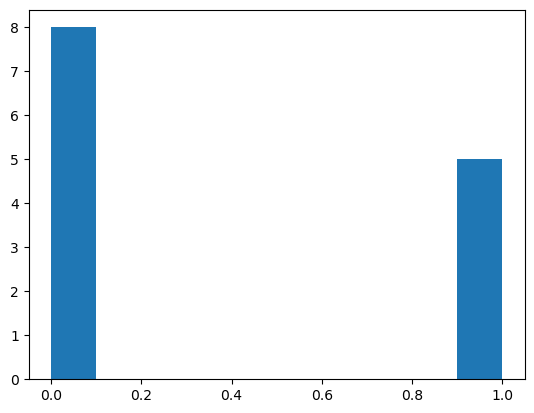

In [34]:
# For Sound: 
plt.hist(kb_df['Sound'])

(array([8., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

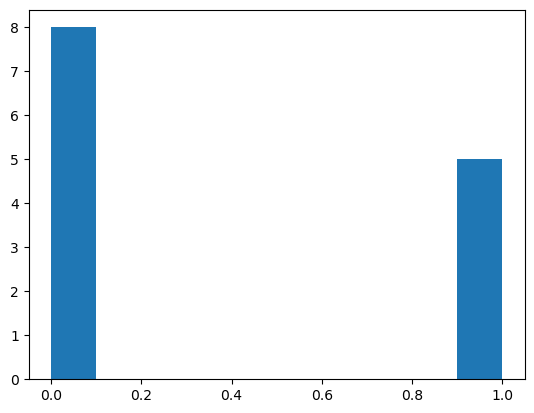

In [35]:
#For Tactility: 
plt.hist(kb_df['Tactility'])

#### While there is some slight deviation in the amount of switches that are both tactile and low/high pitched, I would argue it is fairly close enough to pass the constant variance condition for both.

### **4. Normality**

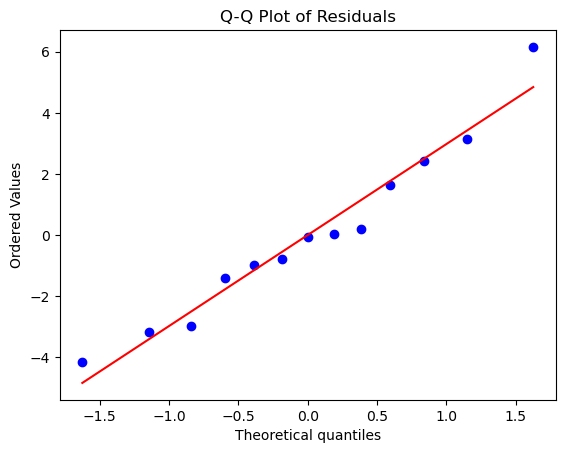

In [36]:
x = kb_df[['Loudness', 'Enjoyment', 'Sound', 'Tactility']]
y = kb_df['Average WPM']

con_x = sm.add_constant(x) 
full_model = sm.OLS(y, con_x).fit() 
predictions = full_model.predict(con_x)
residuals = y - predictions

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

#### As we can see through our QQ plot, our points fall roughly on the line, showing that there's a good chance that our data is normally distributed. 

### **5. Outliers**

##### By observing the QQ plot, while there is an outlier, it's unlikely to have a large effect on our observations. 

#### <span style=color:green> Applying Cook's Distance: </span>

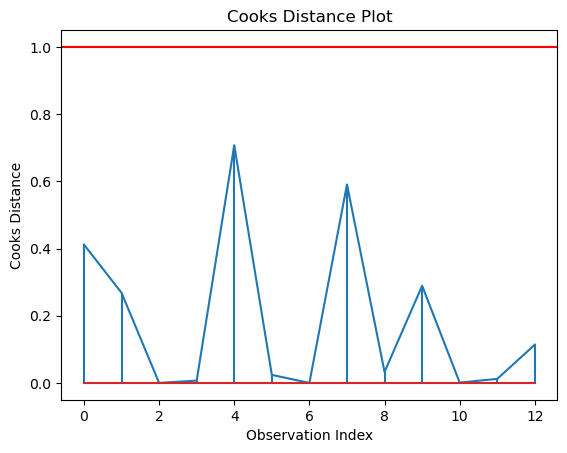

In [37]:
full_influence = full_model.get_influence()

(full_cook_dist, full_p_vals) = full_influence.cooks_distance 

plt.stem(full_cook_dist,markerfmt= '-')
plt.xlabel('Observation Index')
plt.ylabel('Cooks Distance')
plt.title('Cooks Distance Plot')
plt.axhline(1, color = 'red', linestyle= '-')

##### This further confirms my suspicions, confirming that we do not have any heavily influencial outliers.

## <span style=color:green> Observing the Full Model: </span>

In [38]:
full_model.summary()

C:\Users\alexd\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Average WPM   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.9166
Date:                Tue, 05 Aug 2025   Prob (F-statistic):              0.499
Time:                        15:19:08   Log-Likelihood:                -31.458
No. Observations:                  13   AIC:                             72.92
Df Residuals:                       8   BIC:                             75.74
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4111     24.932      2.824      0.022      12.918     127.905
Loudness       0.0996      0.366      0.272      0.792      -0.744       0.943
Enjoyment      0.3927      1.093      0.359      0.729      -2.128       2.913
Sound          1.2687      3.501      0.362      0.726      -6.806       9.343
Tactility      3.7519      2.704      1.388      0.203      -2.483       9.986
==============================================================================
Omnibus:                        1.549   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                0.697
Skew:                           0.565   Prob(JB):                        0.706
Kurtosis:                       2.896   Cond. No.                     1.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations:
    1) There is an interesting relationship occurring between the r^2 and adj. r^2: When penalizing unnessecary predictors, the predictors go from explaining a good amount of variance, to performing worse than if we picked the average WPM. The biggest and most likely reason for this is overfitting, which occurs when we choose too many predictors and not enough data.

    2) For these reasons, we will not try to predict a model based on the following variables, and instead will reduce the number of variables.

## <span style=color:blue>Part 8.2: Can we predict the WPM of a switch based on Loudness and Weight? </span> 

## <span style=color:green> Checking conditions to conduct Linear Regression: </span>

### 1. **Linearity**

Text(0.5, 1.0, 'Residual Plot')

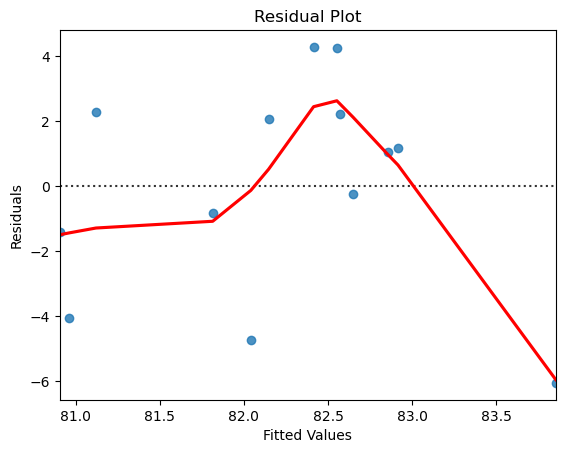

In [39]:
#Checking numeric predictors only:
x = kb_df[['Loudness', 'Weight']]
y = kb_df['Average WPM']

x1 = kb_df['Loudness']
x2 = kb_df['Weight']
con_x = sm.add_constant(x) 
new_model = sm.OLS(y, con_x).fit() 
predictions = new_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### Once again, we see that our data does not behave in a linear pattern.

### <span style=color:green> Applying the same transformations: </span>

Text(0.5, 1.0, 'Residual Plot')

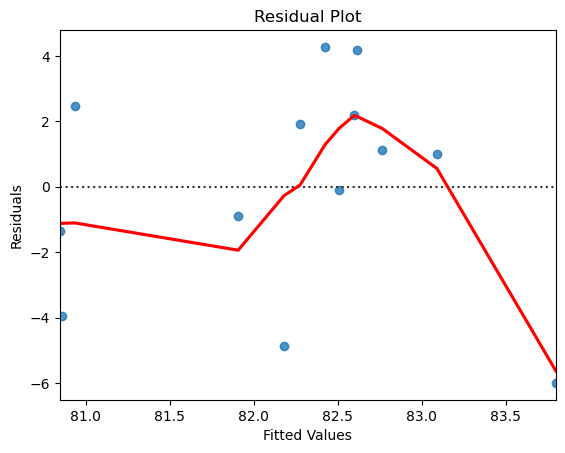

In [40]:
kb_df['Log_Loudness'] = np.log(kb_df["Loudness"])
kb_df['Log_Weight'] = np.log(kb_df["Weight"])
x = kb_df[['Log_Loudness', 'Log_Weight']]
y = kb_df['Average WPM']

con_x = sm.add_constant(x) 
log_x1x2_model = sm.OLS(y, con_x).fit() 
predictions = log_x1x2_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

Text(0.5, 1.0, 'Residual Plot')

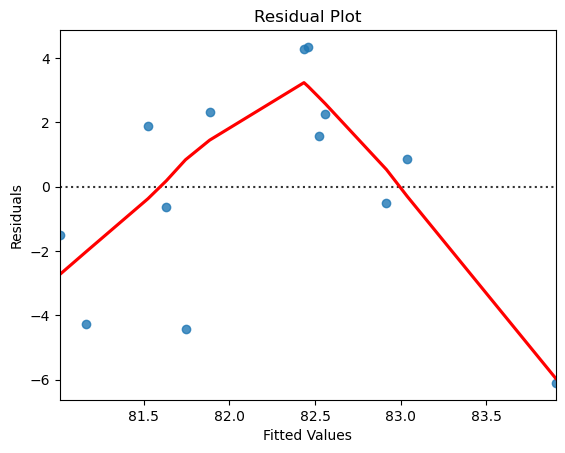

In [41]:
kb_df['Cube_Loudness'] = kb_df["Loudness"]**3
kb_df['Cube_Weight'] = kb_df["Weight"]**3
x = kb_df[['Cube_Loudness', 'Cube_Weight']]
y = kb_df['Average WPM']

con_x = sm.add_constant(x) 
square_x1x2_model = sm.OLS(y, con_x).fit() 
predictions = square_x1x2_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

### Peeking at what our hypothetical model would look like:

In [42]:
new_model.summary()

C:\Users\alexd\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Average WPM   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.125
Method:                 Least Squares   F-statistic:                    0.3327
Date:                Tue, 05 Aug 2025   Prob (F-statistic):              0.725
Time:                        15:19:08   Log-Likelihood:                -33.492
No. Observations:                  13   AIC:                             72.98
Df Residuals:                      10   BIC:                             74.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.3132     23.775      3.042      0.012      19.338     125.288
Loudness       0.1749      0.260      0.673      0.516      -0.404       0.754
Weight        -0.0357      0.173     -0.206      0.841      -0.422       0.350
==============================================================================
Omnibus:                        1.114   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.933
Skew:                          -0.499   Prob(JB):                        0.627
Kurtosis:                       2.148   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <span style=color:red>After some consideration, I have decided to not proceed with multiple linear regression.</span>

### Reasoning: 
    1) Overfitting: Given the small sample size, we are likely to overfit our data unless we are working with a small number of variables or a larger sample size. 
    2) Failing the Linear condition: Despite attempting to transform our data using log/cube transformations, it seems that our data fails the condition no matter what. While I did contemplate the idea of using splines, the added complexity will likely result in overfitting and poor generalization.   

#### **Conclusion:** Despite many attempt, we were unable to create a successful multiple linear regression model, mostly due to our small sample size. Let's try using our raw dataset.

## <span style=color:blue>Part 8.3: Can we predict the WPM of a switch based on Accuracy and Dates? </span> 

## <span style=color:green> Checking conditions to conduct Linear Regression: </span>

### 1. **Linearity**

Text(0.5, 1.0, 'Residual Plot')

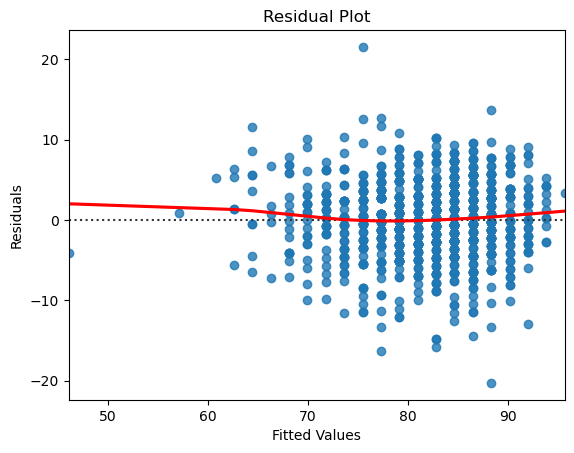

In [43]:
x = raw_df[['Accuracy(%):', 'days_since_start']]
x1 = raw_df['Accuracy(%):']
x2 = raw_df['days_since_start']
y = raw_df['WPM']

con_x = sm.add_constant(x1) 
x1_model = sm.OLS(y, con_x).fit() 
predictions = x1_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

<Axes: >

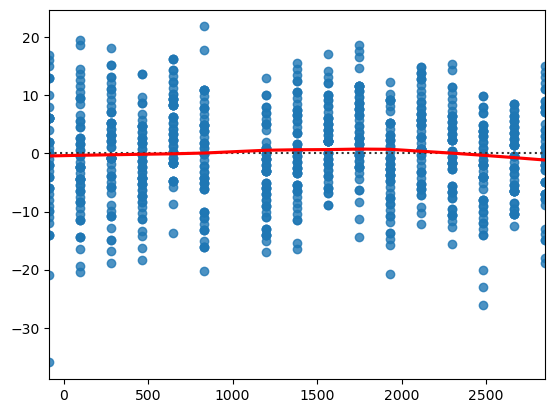

In [44]:
x2 = raw_df['days_since_start']
y = raw_df['WPM']

con_x = sm.add_constant(x2) 
x2_model = sm.OLS(y, con_x).fit() 
predictions = x1_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})

#### While there is a slight bend in both graphs, I don't believe it is siginficant enough to deem the data non-linear. 

### 2. **We pass Independence for the same reasons we did other examples**

### **3. Homoscedasticity:**

#### Looking at both of the residual plots, it seems that our varaince is constant across both predictors.

### **4. Normality**

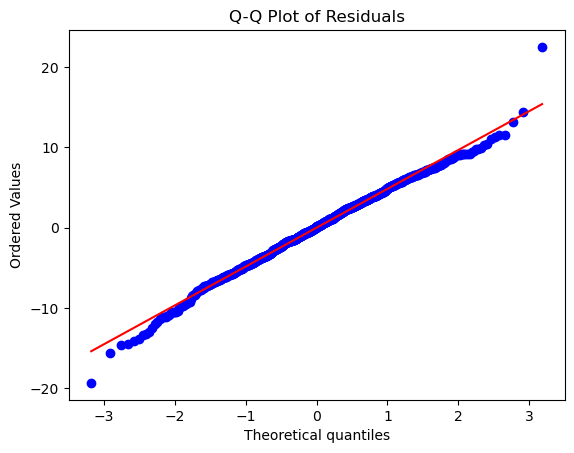

In [45]:
con_x = sm.add_constant(x) 
final_model = sm.OLS(y, con_x).fit() 
predictions = final_model.predict(con_x)
residuals = y - predictions

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

#### Our data roughly fits the linear line, showing that there is strong evidence that our data is normally distributed.

### **5. Outliers**

#### While there are a few points on both ends that can be seen as potential outliers on our QQ Plot/Residual plot, they both likely won't influence the conclusions we plan on drawing from our data. 

### **6. Collinearity:**

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

            feature       VIF
0      Accuracy(%):  3.811395
1  days_since_start  3.811395


#### While there is somewhat of a correlation between our two predictors (3.8), it is unlikely to affect our conclusions. We pass the collinearity clause.

## <span style=color:green> Performing Multiple Linear Regression: </span>

In [47]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WPM   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     871.2
Date:                Tue, 05 Aug 2025   Prob (F-statistic):          2.26e-215
Time:                        15:19:09   Log-Likelihood:                -2844.7
No. Observations:                 950   AIC:                             5695.
Df Residuals:                     947   BIC:                             5710.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -82.9079      4.094    -20.253      0.000     -90.941     -74.874
Accuracy(%):       178.7118      4.535     39.410      0.000     169.813     187.611
days_since_start     0.1512      0.032      4.676      0.000       0.088       0.215
==============================================================================
Omnibus:                       11.537   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.530
Skew:                          -0.156   Prob(JB):                     0.000700
Kurtosis:                       3.520   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations:
    1) A large amount of the variation in our WPM is explained by both the date and Accuracy (r^2: 0.648, adj. r^2: 0.647)
    2) There is a p-value of close to 0 for both predictors, showing both are statistically significant.
    3) The F-statistic of 871 displays that our model is statistically significant. 

## <span style=color:green> Making a predictive model: </span>

### Setting up the model:

In [48]:
#Splitting our data into train/test sets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

#Making the linear model:
final_model = LinearRegression()
final_model.fit(x_train, y_train)

#Making predictions: 
y_predictions = final_model.predict(x_test)

### Evaluating the model:

In [49]:
print(r2_score(y_test, y_predictions))
#RMSE
print(mean_squared_error(y_test, y_predictions)**0.5)

0.6846070725360585
4.434983595423062


### Making a prediction:

##### What is the predicted WPM if I typed an accuracy of 92%, and it's my 3rd day of testing?

In [50]:
prediction = pd.DataFrame({'Accuracy(%):':[0.92], 'days_since_start': [3]})
predict_WPM = final_model.predict(prediction)
print(predict_WPM)

[81.85672524]


### Observations:
    1) When splitting our data and training it on 70% of the raw dataset, 68% of the variance in WPM is explained by the following trained predictors.
    2) On average, the predictive model will likely be about 4.43 WPM off. 
    3) Based on our predictive model, if we have an accuracy of 92% and have started on day 3 of testing, we would likely achieve a WPM of 81.86
    4) Given the findings in 1&2, I can conclude that our model produces good predictive performance. 
    

# <span style=color:blue> Part 9: If we sampled (with replacement) our switch dataset 100 times, what would our mean WPM be?

## <span style=color:green> Performing Bootstrap: </span>

In [51]:
bootstrap_means = []
wpm_values = kb_df['Average WPM'].values


# Run 100 resamples
for _ in range(100):
    resample = np.random.choice(wpm_values, size=len(wpm_values), replace=True)
    bootstrap_means.append(np.mean(resample))

#Finding the mean:
bootstrap_means = np.array(bootstrap_means)
boot_mean = np.mean(bootstrap_means)
print(boot_mean)

#Making a 95% Confidence Interval:
stats.t.interval(confidence = 0.95, df = len(bootstrap_means)-1, loc = np.mean(bootstrap_means), scale=stats.sem(bootstrap_means))

82.14299999999999


(np.float64(81.9716777773), np.float64(82.31432222269997))

### Observations:
    1) If I resampled the data 100 times, I would achieve an average WPM of 82.13. 
    2) I am 95% confident that the confidence interval from 81.97 to 82.29 would capture the true mean WPM 

# <span style=color:blue> Part 10: Conclusion <span>

## <span style=color:green> Part 3: Exploratory Data Analysis: </span>
    1) Predictors seemed to perform as expected.
    2) Swarmplot data offered great insight on how our WPMs based on ID were distributed, showing a variety in spreads and patterns. 

 ## <span style=color:green>Part 4: Is there a correlation between Weight and Average WPM?, Part 5: Is there a correlation between Price and Mean Adj. WPM? </span>
     1) The lack of data seemed to be our biggest problem, as if we had more points, I am sure we could've likely made more concrete/accurate conclusions.
     2) The following resulted in a weak linear relationship( r = 0.14), while also showing that only a small percentage of variability in our data is influenced by weight(0.02). 
     3) These same conclusions can be drawn by the Price and Adj. Mean WPM coefficents


## <span style=color:green>Part 6: Construct a 95% Confidence Interval for Average WPM. </span>
    1) The interval for the raw data produces(80.619, 81.791) a much smaller interval in comparison to the summary dataset(80.15, 84.282). This is likely due to the raw dataset having far more data available(n), making the calculations for the interval more precise, resulting in less variability. 

## <span style=color:green>Part 7: Is there a relationship between dates and Average WPM/Accuracy? </span>
    1) Upon calculating the r coefficient for both predictors(Acc: 0.221, WPM: 0.265), it's clear there is a weak linear relationship between the predictors. Because of this, it is safe to say that neither predictor grows linearly by day. This is further backed by r^2, showing that dates account for about 7%/5% respectively of variations in WPM/accuracy.  
    2) This is likely because I cannot continuously be improving in typing accuracy and WPM every day, as many factors affect these statistics. It's also unreasonable to expect the same amount of growth day-to-day, as while I may improve drastically after a few days of continuously typing, eventually I am going plateau in performance, only increasing in small increments. 

## <span style=color:green>Part 8.1-8.2: Can we predict the WPM of a switch based on Loudness, Enjoyment, Sound, and Tactility?/ Can we predict the WPM of a switch based on Loudness and Weight? </span> 
    1) Despite trying many transformation methods on our data (log/cube), we could not get our data to be linear. 
    2) The lack of available data is further a problem, as we see overfitting being a prominent problem when trying to observe the following data. We needed more data for our summaries to be accurate, leading us to scrap this question completely. 

## <span style=color:green>Part 8.3: Can we predict the WPM of a switch based on Accuracy and Dates? </span> 
    1) Both a switches date and accuracy are statistically significant when considering WPM, with all our summary statistics proving so(adj r^2: 0.647, p-value:~0, F-stat: 871)
    2) Looking at the predictive model, given our RMSE(68%) and variance(4.43 WPM), we can safely assume that our predictive model gives good predictive performance for WPM(given that dates since start and accuracy are predictors). 

## <span style=color:green> Part 9: If we sampled (with replacement) our switch dataset 100 times, what would our mean WPM be?
    1) Both of resampled mean(82.13) and confidence interval(81.97, 82.29) show different results in comparison to our other average and interval statistics. 
        a) The mean for our resampled dataset falls in-between the other two averages. There is a higher overall average WPM than if we just calculated the average with the raw data(81.54), but smaller than if we took the average of the switches without replacement(82.215385).
        b) The summary switch database has a wider interval(80.15, 84.282) than our raw CI (80.619, 81.791), but not nearly as tight as our resample interval.
    2) This shows that by resampling our data with replacement, we were able to alter and change the average of our data to be more accurate, producing a small confidence interval, and a mean closer to the raw dataset.

# <span style=color:blue> Part 11: Future Improvements <span>

#### **1) Bigger Sample Size for switches:** By far the biggest reason I was unable to achieve and do more with this section of the project is because of the lack of summary data. While the Raw data offered more concrete data through the virtue of having more subjects available, the same couldn't be said for our summary set. This lack of data resulted in failed conditions, which also means most of our results were inaccurate. I hope to try and use more switches in the future if I want to perform this type of analysis again. 

#### **2) More Advanced Models:** Through the small sample size, I was locked out of performing more complex models. When training and testing data, you often want a large pool of data so you are able to generalize your findings to unseen data. This means the most I could implement was Bootstrap or Linear Regression. 